# 3-1-1股票数据获取

In [135]:
##获取上证50市值前20股票的股价数据
import tushare as ts
import pandas as pd
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta

#接口token
token="43cc3362b049ecdb6ed2f7bdde2fc6d5f9605f1a335ce783005b5df9"

pro = ts.pro_api(token)

# 文件路径
file_path = 'Data/上证50市值前20成分股.csv'

# 读取Excel文件
A_50 = pd.read_csv(file_path)

#股票代码
ts_code=list(A_50['股票代码'])

data=pro.daily(ts_code=str(ts_code[0])+".SH", start_date="20041107", end_date="20241107")

#给代码加上后缀
for i in range(len(ts_code)-1):
    df = pro.daily(ts_code=str(ts_code[i+1])+".SH", start_date="20041107", end_date="20241107")
    data=pd.concat([data,df],axis=0)
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20241107,1562.46,1653.50,1562.30,1649.14,1571.00,78.14,4.9739,74738.72,1.207495e+07
1,600519.SH,20241106,1575.00,1588.99,1561.22,1571.00,1576.99,-5.99,-0.3798,37631.43,5.916918e+06
2,600519.SH,20241105,1540.00,1577.70,1536.01,1576.99,1548.20,28.79,1.8596,45640.47,7.134443e+06
3,600519.SH,20241104,1544.93,1550.00,1528.06,1548.20,1533.75,14.45,0.9421,29092.92,4.481762e+06
4,600519.SH,20241101,1521.00,1545.13,1520.80,1533.75,1527.79,5.96,0.3901,32283.92,4.954302e+06
...,...,...,...,...,...,...,...,...,...,...,...
3699,601668.SH,20090804,6.63,6.63,6.38,6.47,6.67,-0.20,-2.9985,7428537.95,4.820713e+06
3700,601668.SH,20090803,6.79,6.82,6.56,6.67,6.85,-0.18,-2.6277,8371754.50,5.577209e+06
3701,601668.SH,20090731,6.80,6.92,6.68,6.85,6.94,-0.09,-1.2968,10535057.97,7.145232e+06
3702,601668.SH,20090730,6.80,7.00,6.62,6.94,6.53,0.41,6.2787,16480096.26,1.123723e+07


In [137]:
#按交易日期排序
data=data.sort_values('trade_date',ascending=True)
data.index=pd.to_datetime(data['trade_date'])

data.drop(['trade_date','pre_close','amount'],axis=1,inplace=True)
data

,ts_code,open,high,low,close,change,pct_chg,vol
trade_date,,,,,,,,
2004-11-08,600030.SH,6.81,6.94,6.73,6.92,0.11,1.6200,24292.67
2004-11-08,600276.SH,12.38,12.55,12.03,12.54,-0.02,-0.1600,1260.30
2004-11-08,600028.SH,4.48,4.49,4.40,4.43,-0.05,-1.1200,65770.01
2004-11-08,600809.SH,6.18,6.19,6.03,6.07,-0.14,-2.2500,5166.00
2004-11-08,600900.SH,9.11,9.32,9.06,9.21,0.10,1.1000,225380.28
...,...,...,...,...,...,...,...,...
2024-11-07,601288.SH,4.76,4.80,4.73,4.80,0.03,0.6289,4414664.65
2024-11-07,600028.SH,6.28,6.39,6.25,6.38,0.10,1.5924,1967046.42
2024-11-07,601328.SH,7.19,7.29,7.16,7.29,0.09,1.2500,1252201.76


In [139]:
GZMT=data[data["ts_code"]=="600519.SH"]
GZMT

,ts_code,open,high,low,close,change,pct_chg,vol
trade_date,,,,,,,,
2004-11-08,600519.SH,36.50,37.00,36.02,36.97,0.45,1.2300,3585.53
2004-11-09,600519.SH,37.30,38.30,36.95,38.29,1.32,3.5700,7314.79
2004-11-10,600519.SH,38.00,39.83,38.00,39.45,1.16,3.0300,11288.62
2004-11-11,600519.SH,39.40,39.80,38.80,38.80,-0.65,-1.6500,8330.13
2004-11-12,600519.SH,38.68,39.10,38.27,38.50,-0.30,-0.7700,5667.94
...,...,...,...,...,...,...,...,...
2024-11-01,600519.SH,1521.00,1545.13,1520.80,1533.75,5.96,0.3901,32283.92
2024-11-04,600519.SH,1544.93,1550.00,1528.06,1548.20,14.45,0.9421,29092.92
2024-11-05,600519.SH,1540.00,1577.70,1536.01,1576.99,28.79,1.8596,45640.47


In [141]:
# 读取Excel文件
A_50 = pd.read_csv("Data/上证50市值前20成分股.csv")

#股票代码
ts_code=list(A_50['股票代码'])

stock_code=[]

for i in ts_code:
    stock_code.append(str(i)+".SH")

stock_data={} #用字典存储每只股票的数据
for stock in stock_code:
    stock_data[stock]=data[data.ts_code==stock]
stock_data['600519.SH']

,ts_code,open,high,low,close,change,pct_chg,vol
trade_date,,,,,,,,
2004-11-08,600519.SH,36.50,37.00,36.02,36.97,0.45,1.2300,3585.53
2004-11-09,600519.SH,37.30,38.30,36.95,38.29,1.32,3.5700,7314.79
2004-11-10,600519.SH,38.00,39.83,38.00,39.45,1.16,3.0300,11288.62
2004-11-11,600519.SH,39.40,39.80,38.80,38.80,-0.65,-1.6500,8330.13
2004-11-12,600519.SH,38.68,39.10,38.27,38.50,-0.30,-0.7700,5667.94
...,...,...,...,...,...,...,...,...
2024-11-01,600519.SH,1521.00,1545.13,1520.80,1533.75,5.96,0.3901,32283.92
2024-11-04,600519.SH,1544.93,1550.00,1528.06,1548.20,14.45,0.9421,29092.92
2024-11-05,600519.SH,1540.00,1577.70,1536.01,1576.99,28.79,1.8596,45640.47


# 3-1-2 技术指标计算

In [143]:
import talib as tb
import numpy as np


def tb_computing(df):
    close=np.array(df['close'])
    volume=np.array(df['vol'])
    high=np.array(df['high'])
    low=np.array(df['low'])
    Open=np.array(df['open'])
    
    MA5 = tb.MA(close, timeperiod=5)
    df.loc[:, 'MA5'] = MA5
    
    MA10 = tb.MA(close, timeperiod=10)
    df.loc[:, 'MA10'] = MA10
    
    MA20 = tb.MA(close, timeperiod=20)
    df.loc[:, 'MA20'] = MA20
    
    MACD, MACDsignal, MACDhist = tb.MACD(close, fastperiod=6, slowperiod=12, signalperiod=9)
    df.loc[:, 'MACD'] = MACD
    df.loc[:, 'MACDsignal'] = MACDsignal
    df.loc[:, 'MACDhist'] = MACDhist
    
    EMA12 = tb.EMA(close, timeperiod=12)
    df.loc[:, 'EMA12'] = EMA12
    
    EMA26 = tb.EMA(close, timeperiod=26)
    df.loc[:, 'EMA26'] = EMA26
    
    ATR = tb.ATR(high, low, close)
    df.loc[:, 'ATR'] = ATR
    
    OBV = tb.OBV(close, volume)
    df.loc[:, 'OBV'] = OBV
    
    HT_DC = tb.HT_DCPERIOD(close)
    df.loc[:, 'HT_DC'] = HT_DC
    
    AVG = tb.AVGPRICE(Open, high, low, close)
    df.loc[:, 'AVG'] = AVG
    
    MED = tb.MEDPRICE(high, low)
    df.loc[:, 'MED'] = MED
    
    ADX = tb.ADX(high, low, close)
    df.loc[:, 'ADX'] = ADX
    
    SAR = tb.SAR(high, low)
    df.loc[:, 'SAR'] = SAR
    
    CMO = tb.CMO(close)
    df.loc[:, 'CMO'] = CMO
    
    DX = tb.DX(high, low, close)
    df.loc[:, 'DX'] = DX
    
    ROC = tb.ROC(close)
    df.loc[:, 'ROC'] = ROC


In [145]:
for stock in stock_code:
    tb_computing(stock_data[stock])

/var/folders/lw/01ym023141z_0s9v5gd8gbsr0000gn/T/ipykernel_55818/1804104350.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'MA5'] = MA5
/var/folders/lw/01ym023141z_0s9v5gd8gbsr0000gn/T/ipykernel_55818/1804104350.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'MA10'] = MA10
/var/folders/lw/01ym023141z_0s9v5gd8gbsr0000gn/T/ipykernel_55818/1804104350.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [147]:
stock_data['600519.SH']

,ts_code,open,high,low,close,change,pct_chg,vol,MA5,MA10,...,ATR,OBV,HT_DC,AVG,MED,ADX,SAR,CMO,DX,ROC
trade_date,,,,,,,,,,,,,,,,,,,,,
2004-11-08,600519.SH,36.50,37.00,36.02,36.97,0.45,1.2300,3585.53,NaN,NaN,...,NaN,3585.53,NaN,36.6225,36.510,NaN,NaN,NaN,NaN,NaN
2004-11-09,600519.SH,37.30,38.30,36.95,38.29,1.32,3.5700,7314.79,NaN,NaN,...,NaN,10900.32,NaN,37.7100,37.625,NaN,36.020000,NaN,NaN,NaN
2004-11-10,600519.SH,38.00,39.83,38.00,39.45,1.16,3.0300,11288.62,NaN,NaN,...,NaN,22188.94,NaN,38.8200,38.915,NaN,36.065600,NaN,NaN,NaN
2004-11-11,600519.SH,39.40,39.80,38.80,38.80,-0.65,-1.6500,8330.13,NaN,NaN,...,NaN,13858.81,NaN,39.2000,39.300,NaN,36.216176,NaN,NaN,NaN
2004-11-12,600519.SH,38.68,39.10,38.27,38.50,-0.30,-0.7700,5667.94,38.402,NaN,...,NaN,8190.87,NaN,38.6375,38.685,NaN,36.360729,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,600519.SH,1521.00,1545.13,1520.80,1533.75,5.96,0.3901,32283.92,1538.032,1544.051,...,48.169341,6089478.56,18.011224,1530.1700,1532.965,31.692964,1646.009138,3.888833,26.127856,-0.470474
2024-11-04,600519.SH,1544.93,1550.00,1528.06,1548.20,14.45,0.9421,29092.92,1534.672,1545.991,...,46.295816,6118571.48,17.911418,1542.7975,1539.030,31.382088,1632.645207,7.876123,27.340693,1.268969
2024-11-05,600519.SH,1540.00,1577.70,1536.01,1576.99,28.79,1.8596,45640.47,1543.746,1549.390,...,45.966829,6164211.95,17.805374,1557.6750,1556.855,31.567663,1620.350391,15.406225,33.980140,2.202852


In [149]:
##数据拼接
data_list=[stock_data[stock] for stock in stock_code]
data=pd.concat(data_list)

In [151]:
data

,ts_code,open,high,low,close,change,pct_chg,vol,MA5,MA10,...,ATR,OBV,HT_DC,AVG,MED,ADX,SAR,CMO,DX,ROC
trade_date,,,,,,,,,,,,,,,,,,,,,
2004-11-08,600519.SH,36.50,37.00,36.02,36.97,0.45,1.2300,3585.53,NaN,NaN,...,NaN,3.585530e+03,NaN,36.6225,36.510,NaN,NaN,NaN,NaN,NaN
2004-11-09,600519.SH,37.30,38.30,36.95,38.29,1.32,3.5700,7314.79,NaN,NaN,...,NaN,1.090032e+04,NaN,37.7100,37.625,NaN,36.020000,NaN,NaN,NaN
2004-11-10,600519.SH,38.00,39.83,38.00,39.45,1.16,3.0300,11288.62,NaN,NaN,...,NaN,2.218894e+04,NaN,38.8200,38.915,NaN,36.065600,NaN,NaN,NaN
2004-11-11,600519.SH,39.40,39.80,38.80,38.80,-0.65,-1.6500,8330.13,NaN,NaN,...,NaN,1.385881e+04,NaN,39.2000,39.300,NaN,36.216176,NaN,NaN,NaN
2004-11-12,600519.SH,38.68,39.10,38.27,38.50,-0.30,-0.7700,5667.94,38.402,NaN,...,NaN,8.190870e+03,NaN,38.6375,38.685,NaN,36.360729,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,601668.SH,6.02,6.33,6.02,6.15,0.13,2.1595,4451366.16,6.078,6.241,...,0.237176,6.653297e+08,29.133009,6.1300,6.175,29.880726,6.591597,8.430691,12.729981,-2.070064
2024-11-04,601668.SH,6.17,6.18,6.06,6.15,0.00,0.0000,2077138.24,6.080,6.206,...,0.228806,6.653297e+08,29.553542,6.1400,6.120,28.655673,6.565133,8.430691,12.729981,-5.384615
2024-11-05,601668.SH,6.09,6.25,6.09,6.23,0.08,1.3008,3156358.25,6.112,6.187,...,0.223892,6.684860e+08,30.354213,6.1650,6.170,27.814950,6.539728,12.561872,16.885550,-2.959502


In [153]:
data.to_csv('Data/Stock_dataset.csv', encoding='utf-8', index=True)

# 3-1-3 股票数据预处理

In [59]:
import pandas as pd

data=pd.read_csv('Data/Stock_dataset.csv',encoding='utf-8',index_col=0)

data

,ts_code,open,high,low,close,change,pct_chg,vol,MA5,MA10,...,ATR,OBV,HT_DC,AVG,MED,ADX,SAR,CMO,DX,ROC
trade_date,,,,,,,,,,,,,,,,,,,,,
2004-11-08,600519.SH,36.50,37.00,36.02,36.97,0.45,1.2300,3585.53,NaN,NaN,...,NaN,3.585530e+03,NaN,36.6225,36.510,NaN,NaN,NaN,NaN,NaN
2004-11-09,600519.SH,37.30,38.30,36.95,38.29,1.32,3.5700,7314.79,NaN,NaN,...,NaN,1.090032e+04,NaN,37.7100,37.625,NaN,36.020000,NaN,NaN,NaN
2004-11-10,600519.SH,38.00,39.83,38.00,39.45,1.16,3.0300,11288.62,NaN,NaN,...,NaN,2.218894e+04,NaN,38.8200,38.915,NaN,36.065600,NaN,NaN,NaN
2004-11-11,600519.SH,39.40,39.80,38.80,38.80,-0.65,-1.6500,8330.13,NaN,NaN,...,NaN,1.385881e+04,NaN,39.2000,39.300,NaN,36.216176,NaN,NaN,NaN
2004-11-12,600519.SH,38.68,39.10,38.27,38.50,-0.30,-0.7700,5667.94,38.402,NaN,...,NaN,8.190870e+03,NaN,38.6375,38.685,NaN,36.360729,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,601668.SH,6.02,6.33,6.02,6.15,0.13,2.1595,4451366.16,6.078,6.241,...,0.237176,6.653297e+08,29.133009,6.1300,6.175,29.880726,6.591597,8.430691,12.729981,-2.070064
2024-11-04,601668.SH,6.17,6.18,6.06,6.15,0.00,0.0000,2077138.24,6.080,6.206,...,0.228806,6.653297e+08,29.553542,6.1400,6.120,28.655673,6.565133,8.430691,12.729981,-5.384615
2024-11-05,601668.SH,6.09,6.25,6.09,6.23,0.08,1.3008,3156358.25,6.112,6.187,...,0.223892,6.684860e+08,30.354213,6.1650,6.170,27.814950,6.539728,12.561872,16.885550,-2.959502


In [60]:
# 读取csv文件
A_50 = pd.read_csv("Data/上证50市值前20成分股.csv")

#股票代码
ts_code=list(A_50['股票代码'])

stock_code=[]

for i in ts_code:
    stock_code.append(str(i)+".SH")

stock_data={} #用字典存储每只股票的数据
for stock in stock_code:
    stock_data[stock]=data[data.ts_code==stock]

for stock in stock_code:
    stock_data_description=stock_data[stock].describe().T
    stock_data_description['null']=len(stock_data[stock])-stock_data_description['count']
    stock_data_description=stock_data_description[['count','null','max','min']]

In [61]:
#处理缺失值
for stock in stock_code:
    df=stock_data[stock].copy()
    df.fillna(0,inplace=True)
    stock_data[stock]=df.copy()

In [62]:
for stock in stock_code:
    stock_data_description=stock_data[stock].describe().T
    stock_data_description['null']=len(stock_data[stock])-stock_data_description['count']
    stock_data_description=stock_data_description[['null','max','min']]

In [63]:
#删除股票代码，展示贵州茅台的数据
for stock in stock_code:
    stock_data[stock].drop(['ts_code'],axis=1,inplace=True)

In [64]:
#将每个字典的输入特征提取出来
#用于存储输入特征，后续需要进行PCA降维、归一化处理
Stock_X={}
for stock in stock_code:
    Stock_X[stock]=stock_data[stock].drop(['close'],axis=1)
#展示贵州茅台的数据
Stock_X['600519.SH']

,open,high,low,change,pct_chg,vol,MA5,MA10,MA20,MACD,...,ATR,OBV,HT_DC,AVG,MED,ADX,SAR,CMO,DX,ROC
trade_date,,,,,,,,,,,,,,,,,,,,,
2004-11-08,36.50,37.00,36.02,0.45,1.2300,3585.53,0.000,0.000,0.0000,0.000000,...,0.000000,3585.53,0.000000,36.6225,36.510,0.000000,0.000000,0.000000,0.000000,0.000000
2004-11-09,37.30,38.30,36.95,1.32,3.5700,7314.79,0.000,0.000,0.0000,0.000000,...,0.000000,10900.32,0.000000,37.7100,37.625,0.000000,36.020000,0.000000,0.000000,0.000000
2004-11-10,38.00,39.83,38.00,1.16,3.0300,11288.62,0.000,0.000,0.0000,0.000000,...,0.000000,22188.94,0.000000,38.8200,38.915,0.000000,36.065600,0.000000,0.000000,0.000000
2004-11-11,39.40,39.80,38.80,-0.65,-1.6500,8330.13,0.000,0.000,0.0000,0.000000,...,0.000000,13858.81,0.000000,39.2000,39.300,0.000000,36.216176,0.000000,0.000000,0.000000
2004-11-12,38.68,39.10,38.27,-0.30,-0.7700,5667.94,38.402,0.000,0.0000,0.000000,...,0.000000,8190.87,0.000000,38.6375,38.685,0.000000,36.360729,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1521.00,1545.13,1520.80,5.96,0.3901,32283.92,1538.032,1544.051,1573.2995,-3.032028,...,48.169341,6089478.56,18.011224,1530.1700,1532.965,31.692964,1646.009138,3.888833,26.127856,-0.470474
2024-11-04,1544.93,1550.00,1528.06,14.45,0.9421,29092.92,1534.672,1545.991,1563.3095,-1.206742,...,46.295816,6118571.48,17.911418,1542.7975,1539.030,31.382088,1632.645207,7.876123,27.340693,1.268969
2024-11-05,1540.00,1577.70,1536.01,28.79,1.8596,45640.47,1543.746,1549.390,1556.0090,3.745980,...,45.966829,6164211.95,17.805374,1557.6750,1556.855,31.567663,1620.350391,15.406225,33.980140,2.202852


In [65]:
#将每个字典的股票收盘价提取出来
#用于存储收盘价
Stock_Y={}
for stock in stock_code:
    Stock_Y[stock]=pd.DataFrame({'close':stock_data[stock]['close']})
#展示贵州茅台的数据
Stock_Y['600519.SH']

,close
trade_date,
2004-11-08,36.97
2004-11-09,38.29
2004-11-10,39.45
2004-11-11,38.80
2004-11-12,38.50
...,...
2024-11-01,1533.75
2024-11-04,1548.20
2024-11-05,1576.99


In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

X_scaled={} #存储每只股票输入特征的字典
for stock in stock_code:
    mm=MinMaxScaler()
    X_scaled[stock]=pd.DataFrame(mm.fit_transform(Stock_X[stock]),
                                          columns=Stock_X[stock].columns,
                                          index=Stock_X[stock].index)
#查看归一化后的数据
X_scaled["600519.SH"]

,open,high,low,change,pct_chg,vol,MA5,MA10,MA20,MACD,...,ATR,OBV,HT_DC,AVG,MED,ADX,SAR,CMO,DX,ROC
trade_date,,,,,,,,,,,,,,,,,,,,,
2004-11-08,0.000717,0.000636,0.000751,0.517839,0.600364,0.011587,0.000000,0.000000,0.000000,0.470576,...,0.000000,0.001626,0.000000,0.000697,0.000695,0.000000,0.000000,0.460296,0.000000,0.476795
2004-11-09,0.001030,0.001138,0.001130,0.520452,0.706873,0.024495,0.000000,0.000000,0.000000,0.470576,...,0.000000,0.002582,0.000000,0.001130,0.001139,0.000000,0.013707,0.460296,0.000000,0.476795
2004-11-10,0.001304,0.001728,0.001559,0.519971,0.682294,0.038250,0.000000,0.000000,0.000000,0.470576,...,0.000000,0.004057,0.000000,0.001573,0.001652,0.000000,0.013724,0.460296,0.000000,0.476795
2004-11-11,0.001852,0.001716,0.001885,0.514535,0.469276,0.028010,0.000000,0.000000,0.000000,0.470576,...,0.000000,0.002968,0.000000,0.001724,0.001806,0.000000,0.013782,0.460296,0.000000,0.476795
2004-11-12,0.001571,0.001446,0.001669,0.515587,0.509331,0.018795,0.015538,0.000000,0.000000,0.470576,...,0.000000,0.002228,0.000000,0.001500,0.001561,0.000000,0.013837,0.460296,0.000000,0.476795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,0.582119,0.582358,0.606581,0.534386,0.562135,0.110923,0.622321,0.649416,0.697660,0.455028,...,0.467183,0.796825,0.408364,0.596169,0.596494,0.467255,0.626364,0.484065,0.292498,0.472642
2024-11-04,0.591491,0.584236,0.609543,0.559883,0.587260,0.099877,0.620961,0.650231,0.693230,0.464388,...,0.449012,0.800626,0.406101,0.601203,0.598909,0.462672,0.621278,0.508436,0.306075,0.487995
2024-11-05,0.589560,0.594921,0.612787,0.602949,0.629021,0.157155,0.624633,0.651661,0.689993,0.489784,...,0.445822,0.806590,0.403697,0.607135,0.606006,0.465408,0.616600,0.554462,0.380403,0.496238


# 3-1-3 PCA降维<p>
需要将收盘价单独提取出来

In [67]:
from sklearn.decomposition import PCA

X_PCA={} #存储每只股票降维后的数据
PCA_result={}
for stock in stock_code:
    data=X_scaled[stock].copy()
    print(data)
    pca=PCA()
    data_pca=pca.fit_transform(data)
    #显示模型各个主成分各自方差的百分比(贡献率)
    formatted_ratio = ["{:.2%}".format(ratio) for ratio in pca.explained_variance_ratio_]
    eigenvalue=["{:.4f}".format(variance) for variance in pca.explained_variance_]
    s=0
    cumulative_ratio=[]
    for variance_ratio in pca.explained_variance_ratio_:
        if s<0.95:
            s+=variance_ratio
            cumulative_ratio.append("{:.2%}".format(s))
            
    result=pd.DataFrame({'特征值':eigenvalue[:len(cumulative_ratio)],
                      '方差百分比':formatted_ratio[:len(cumulative_ratio)],
                     '累计方差贡献率':cumulative_ratio}
                     )
    print("{}数据集：\n{}".format(stock,result))
    PCA_result[stock]=result
    
    k=len(result.index) #k为要保留的主成分个数
    #主成分权重（载荷）
    components = pca.components_
    #print("{}数据集：\n{}".format(stock,components))
    
    pca=PCA(n_components=k) #将筛选出来的主成分保留
    data_pca=pca.fit_transform(data) #保留k个主成分后的数据
    columns_name=[]
    for i in range(k):
        columns_name.append("主成分"+str(i+1))
    
    df=pd.DataFrame(data_pca,
                    columns=columns_name,
                    index=data.index)
    #将降维后每只股票的数据集保存
    X_PCA[stock]=df

                open      high       low    change   pct_chg       vol  \
trade_date                                                               
2004-11-08  0.000717  0.000636  0.000751  0.517839  0.600364  0.011587   
2004-11-09  0.001030  0.001138  0.001130  0.520452  0.706873  0.024495   
2004-11-10  0.001304  0.001728  0.001559  0.519971  0.682294  0.038250   
2004-11-11  0.001852  0.001716  0.001885  0.514535  0.469276  0.028010   
2004-11-12  0.001571  0.001446  0.001669  0.515587  0.509331  0.018795   
...              ...       ...       ...       ...       ...       ...   
2024-11-01  0.582119  0.582358  0.606581  0.534386  0.562135  0.110923   
2024-11-04  0.591491  0.584236  0.609543  0.559883  0.587260  0.099877   
2024-11-05  0.589560  0.594921  0.612787  0.602949  0.629021  0.157155   
2024-11-06  0.603268  0.599276  0.623073  0.498498  0.527091  0.129432   
2024-11-07  0.598357  0.624159  0.623514  0.751156  0.770774  0.257875   

                 MA5      MA10      M

In [68]:
#降维后的数据集，以贵州茅台为例
X_PCA['600519.SH']

,主成分1,主成分2,主成分3,主成分4
trade_date,,,,
2004-11-08,-0.957269,-0.564814,-0.093031,0.243103
2004-11-09,-0.952961,-0.556666,-0.088975,0.268305
2004-11-10,-0.951734,-0.556843,-0.087355,0.260357
2004-11-11,-0.951265,-0.572369,-0.095978,0.207914
2004-11-12,-0.947619,-0.570779,-0.097300,0.219707
...,...,...,...,...
2024-11-01,1.305763,0.022090,-0.125912,0.001337
2024-11-04,1.306917,0.041991,-0.120171,0.035612
2024-11-05,1.314678,0.126929,-0.121226,0.075516


# 3-1-3 CNN-GRU 模型设计与实现

In [69]:
'''
批量标准化股票的收盘价
'''
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

y_scaled={} #存储每只股票输入特征的字典
y_mm_scaler={}
for stock in stock_code:
    mm=MinMaxScaler()
    scaled_close=mm.fit_transform(Stock_Y[stock])
    y_scaled[stock]=pd.DataFrame(         scaled_close,
                                          columns=Stock_Y[stock].columns,
                                          index=Stock_Y[stock].index)
    #需要保存实例，便后续逆变换为原始股价
    y_mm_scaler[stock]=mm
#查看归一化后的数据
y_scaled["600519.SH"]

,close
trade_date,
2004-11-08,0.000873
2004-11-09,0.001387
2004-11-10,0.001839
2004-11-11,0.001586
2004-11-12,0.001469
...,...
2024-11-01,0.584124
2024-11-04,0.589755
2024-11-05,0.600973


In [70]:
# 数据X和y格式转换
import numpy as np
import pandas as pd

'''
批量分离股票数据X和y的格式
'''
# 初始化X和Y的字典
X_processed_dict={}
y_processed_dict={}


for stock in stock_code:
    # 分离特征和目标变量
    X_GZMT=X_PCA[stock]
    #X_GZMT=X_scaled[stock]
    Y_GZMT=y_scaled[stock]

    # 假设你想用前30个交易日的数据预测第31天的收盘价
    timesteps = 30
    
    # 初始化X和Y的列表
    X_processed = []
    y_processed = []

    # 遍历DataFrame并创建序列数据
    for i in range(len(X_GZMT) - timesteps):
        X_processed.append(X_GZMT.iloc[i:(i + timesteps)].values)  #提取i到i+29天的特征作为一个序列
        y_processed.append(Y_GZMT.iloc[i + timesteps])  # 第31天的收盘价作为目标

    # 将列表转换为NumPy数组
    X_processed = np.array(X_processed)
    y_processed = np.array(y_processed)

    # 确保X是3D张量，形状为(batch_size, timesteps, input_features)
    print("X_processed shape:", X_processed.shape)

    # 确保Y是2D张量，形状为(batch_size, 1)
    y_processed = y_processed.reshape(-1, 1)  # 调整形状以确保Y是2D张量
    print("y_processed shape:", y_processed.shape)
    
    X_processed_dict[stock]=X_processed
    y_processed_dict[stock]=y_processed

X_processed shape: (4762, 30, 4)
y_processed shape: (4762, 1)
X_processed shape: (4331, 30, 7)
y_processed shape: (4331, 1)
X_processed shape: (3443, 30, 7)
y_processed shape: (3443, 1)
X_processed shape: (4096, 30, 8)
y_processed shape: (4096, 1)
X_processed shape: (4414, 30, 7)
y_processed shape: (4414, 1)
X_processed shape: (4294, 30, 7)
y_processed shape: (4294, 1)
X_processed shape: (4761, 30, 6)
y_processed shape: (4761, 1)
X_processed shape: (4055, 30, 8)
y_processed shape: (4055, 1)
X_processed shape: (4407, 30, 6)
y_processed shape: (4407, 1)
X_processed shape: (4205, 30, 6)
y_processed shape: (4205, 1)
X_processed shape: (4786, 30, 6)
y_processed shape: (4786, 1)
X_processed shape: (4736, 30, 7)
y_processed shape: (4736, 1)
X_processed shape: (4260, 30, 6)
y_processed shape: (4260, 1)
X_processed shape: (1160, 30, 9)
y_processed shape: (1160, 1)
X_processed shape: (3945, 30, 6)
y_processed shape: (3945, 1)
X_processed shape: (4791, 30, 7)
y_processed shape: (4791, 1)
X_proces

In [71]:
import numpy as np

def split_train_test_time_series(X, y, train_size=0.8):
    """
    按时间序列顺序划分数据为训练集和测试集。
    
    参数:
    X -- 完整的特征数据集，假设形状为 (samples, timesteps, features)
    y -- 完整的目标数据集，假设形状为 (samples,) 或 (samples, output_features)
    train_size -- 训练数据集占总数据集的比例，默认为0.8
    
    返回值:
    x_train, x_test, y_train, y_test -- 分别为训练特征集、测试特征集、训练目标集、测试目标集
    """
    # 计算训练数据的数量
    total_samples = X.shape[0]
    train_samples = int(total_samples * train_size)
    
    # 按时间顺序划分训练集和测试集
    x_train = X[:train_samples]
    x_test = X[train_samples:]
    y_train = y[:train_samples]
    y_test = y[train_samples:]
    
    return x_train, x_test, y_train, y_test

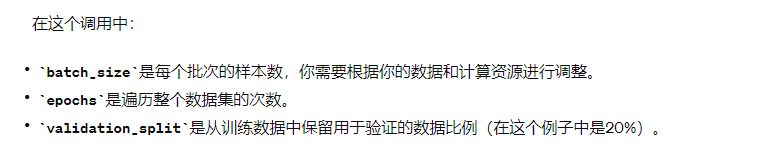

In [ ]:
import numpy as np
from keras.models import Sequential
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Bidirectional, Dense, Activation
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

# 自定义 Attention 层
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # 创建可训练的权重
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # 使用softmax函数计算权重
        et = K.squeeze(K.tanh(K.dot(inputs, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = inputs * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

def Create_CNN_BiLSTM_Attention(filters, kernel_size, strides, pool_size, dropout, BiLSTM_units, input_shape):
    """
    构建基于CNN-BiLSTM-Attention的深度学习模型

    参数:
    - filters1: 卷积层的过滤器数量
    - kernel_size1: 卷积核大小
    - strides1: 卷积步幅
    - BiLSTM_units: BiLSTM 层的神经元数量
    - dropout: Dropout 比例
    - input_shape: 输入数据的形状
    - output_shape: 输出数据的形状（默认为1）

    返回:
    - 编译后的 Keras 模型
    """
    # 模型定义
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(BiLSTM_units, return_sequences=True, activation='tanh')))
    model.add(AttentionLayer())
    model.add(Dense(1))  # 假设你的输出是单变量的收盘价格
    #optimizer = Adam(learning_rate=0.005)
    model.compile(optimizer="adam", loss='mean_squared_error')
    model.summary()
    return model

In [81]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN,GRU,LSTM,Dense,Dropout
from sklearn.metrics import mean_squared_error

def Create_CNN_GRU(filters, kernel_size, strides, pool_size, dropout1, dropout2, GRU_units, input_shape):
    # 构建GRU模型
    model = Sequential()
    model.add(Conv1D(filters,kernel_size,strides, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout1))  #在GRU单元内部的输入连接上应用的Dropout比率
    model.add(GRU(GRU_units))
    model.add(Dropout(dropout2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
def Create_RNN(dropout, RNN_units,input_shape):
    # 构建模型
    model = Sequential()
    model.add(SimpleRNN(RNN_units, input_shape=input_shape, activation='relu'))
    model.add(Dropout(dropout))            
    model.add(Dense(1))
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model
def Create_LSTM(dropout, LSTM_units, input_shape):
    model = Sequential()
    model.add(LSTM(LSTM_units, input_shape=input_shape))
    model.add(Dropout(dropout)) 
    model.add(Dense(1))
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model
def Create_BiLSTM(dropout, BiLSTM_units, input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(BiLSTM_units, return_sequences=False, activation='tanh'), input_shape=input_shape))
    model.add(Dropout(dropout)) 
    model.add(Dense(1))
    #optimizer = Adam(learning_rate=0.005)
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model
def Create_CNN_BiLSTM(filters, kernel_size, strides, pool_size, dropout1, dropout2, BiLSTM_units, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout1))
    model.add(Bidirectional(LSTM(BiLSTM_units, return_sequences=False, activation='tanh')))
    model.add(Dropout(dropout2))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model
def Create_CNN_LSTM(filters, kernel_size, strides, pool_size, dropout1, dropout2, LSTM_units, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout1))
    model.add(LSTM(LSTM_units, return_sequences=False, activation='tanh'))
    model.add(Dropout(dropout2))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss='mean_squared_error')
    return model
def Create_GRU(dropout, GRU_units,input_shape):
    # 构建GRU模型
    model = Sequential()
    model.add(GRU(GRU_units,input_shape=input_shape))
    model.add(Dropout(dropout))  #在GRU单元内部的输入连接上应用的Dropout比率
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
'''
遍历训练每支股票的模型
'''
def Model_Training(Model_name, params):
    MAE_dict={}
    MSE_dict={}
    MAPE_dict={}
    Y_test_dict={}
    Y_predict_dict={}
    for stock in stock_code:
        
        x_train, x_test, y_train, y_test=split_train_test_time_series(X_processed_dict[stock],y_processed_dict[stock])
        Y_test_dict[stock]=y_test
        
        input_dim=x_train.shape[2] #特征输入维度
        time_steps=30
        input_shape=(time_steps, input_dim) #输入形状
        batch_size=128
        epochs=100
        y_test_predict_all = []
        
        # 训练模型 3 次并取平均
        for i in range(3):
                #获取训练集数据
            if Model_name == "CNN_BiLSTM_Attention":
                model=Create_CNN_BiLSTM_Attention(
                    filters=params['filters'],
                    kernel_size=params['kernel_size'],
                    strides=params['strides'],
                    pool_size=params['pool_size'],
                    BiLSTM_units=params['BiLSTM_units'],
                    dropout1=params['dropout1'],
                    dropout2=params['dropout2'],
                    input_shape=input_shape
                )
            elif Model_name == "RNN":
                model=Create_RNN(
                    RNN_units=params['RNN_units'],
                    dropout=params['dropout'],
                    input_shape=input_shape
                )
            elif Model_name == "LSTM":
                model=Create_LSTM(
                    LSTM_units=params['LSTM_units'],
                    dropout=params['dropout'],
                    input_shape=input_shape
                )
            elif Model_name == "BiLSTM":
                model=Create_BiLSTM(
                    BiLSTM_units=params['BiLSTM_units'],
                    dropout=params['dropout'],
                    input_shape=input_shape
                )
            elif Model_name == "CNN_BiLSTM":
                model=Create_CNN_BiLSTM(
                    filters=params['filters'],
                    kernel_size=params['kernel_size'],
                    strides=params['strides'],
                    pool_size=params['pool_size'],
                    BiLSTM_units=params['BiLSTM_units'],
                    dropout1=params['dropout1'],
                    dropout2=params['dropout2'],
                    input_shape=input_shape
            )
            elif Model_name == "CNN_LSTM":
                    model=Create_CNN_LSTM(
                        filters=params['filters'],
                        kernel_size=params['kernel_size'],
                        strides=params['strides'],
                        pool_size=params['pool_size'],
                        LSTM_units=params['LSTM_units'],
                        dropout1=params['dropout1'],
                        dropout2=params['dropout2'],
                        input_shape=input_shape
                    )
            elif Model_name == "CNN_GRU":
                    model=Create_CNN_GRU(
                        filters=params['filters'],
                        kernel_size=params['kernel_size'],
                        strides=params['strides'],
                        pool_size=params['pool_size'],
                        GRU_units=params['GRU_units'],
                        dropout1=params['dropout1'],
                        dropout2=params['dropout2'],
                        input_shape=input_shape
                    )
            elif Model_name == "GRU":
                    model=Create_GRU(
                        GRU_units=params['GRU_units'],
                        dropout=params['dropout'],
                        input_shape=input_shape
                    )
            else:
                    break 
            early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
            history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=0)

            if stock == "600519.SH":
                # 保存模型
                model.save(f'{Model_name}_{stock}_run{i+1}_model.h5')
                print(f"Model for {stock} run {i+1} saved as {Model_name}_{stock}_run{i+1}_model.h5")
    
                # 保存模型结构图
                from tensorflow.keras.utils import plot_model
                plot_model(model, to_file=f'{Model_name}_{stock}_run{i+1}_model_structure.png', show_shapes=True)
                print(f"Model structure for {stock} run {i+1} saved as {Model_name}_{stock}_run{i+1}_model_structure.png")

            # 测试评估
            y_test_predict = model.predict(x_test)
            y_test_predict_all.append(y_test_predict)
        
        # 取 3 次预测的平均值
        y_test_predict_avg = np.mean(y_test_predict_all, axis=0)
        Y_predict_dict[stock] = y_test_predict_avg
        
        
        # 计算 MAE
        mae = mean_absolute_error(y_test, y_test_predict_avg)
        MAE_dict[stock]=mae
        print(stock+" Mean Absolute Error (MAE):", mae)
        
        # 计算 MSE
        mse = mean_squared_error(y_test, y_test_predict_avg)
        MSE_dict[stock]=mse
        print(stock+" Mean Squared Error (MSE):", mse)
        
        # 计算 MAPE
        # 注意：MAPE 在 scikit-learn 中没有直接的函数，需要手动计算
        # 为避免除以零，可以添加一个小的常数 epsilon 到分母
        epsilon = 1e-10
        mape = np.mean(np.abs((y_test - y_test_predict_avg) / (y_test + epsilon))) * 100
        MAPE_dict[stock]=mape
        print(stock+" Mean Absolute Percentage Error (MAPE):", mape, "%")
    return MAE_dict, MSE_dict, MAPE_dict, Y_test_dict, Y_predict_dict

## 3.4.2 模型泛化能力实验及结果分析

In [98]:
'''
每支股票的mae、mse、mape，做成一个dataframe
'''
def prediction_validation(MAE_dict, MSE_dict, MAPE_dict):
    mae=[]
    mse=[]
    mape=[]
    for i in stock_code:
        mae.append(MAE_dict[i])
        mse.append(MSE_dict[i])
        mape.append(MAPE_dict[i])
    for j in
    prediction_result=pd.DataFrame({"股票名称":stock_code,
                                    "MAE":mae,
                                    "MSE":mse,
                                    "MAPE":mape})
    return prediction_result

### CNN_GRU模型超参数选取

In [76]:
from sklearn.model_selection import ParameterGrid
# CNN-GRU Model Parameter Search
def Search_CNN_GRU_Best_Params(x_train, y_train, x_test, y_test, input_shape):
    param_grid = {
        'filters': [16, 32, 64],
        'kernel_size': [2, 3],
        'strides': [1, 2],
        'pool_size': [1,2],
        'GRU_units': [32, 64, 128],
        'dropout1': [0.05, 0.1, 0.15, 0.3],
        'dropout2': [0.05, 0.1, 0.15, 0.3]
    }
    
    best_params = None
    best_test_mape = float('inf')
    grid = ParameterGrid(param_grid)
    
    for params in grid:
        print(f"Training with params: {params}")
        model = Create_CNN_GRU(
            filters=params['filters'],
            kernel_size=params['kernel_size'],
            strides=params['strides'],
            pool_size=params['pool_size'],
            GRU_units=params['GRU_units'],
            dropout1=params['dropout1'],
            dropout2=params['dropout2'],
            input_shape=input_shape
        )
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=0)
        
        # 测试集上的评估
        y_test_predict = model.predict(x_test)
        epsilon = 1e-10
        test_mape = np.mean(np.abs((y_test - y_test_predict) / (y_test + epsilon))) * 100
        print(f"Test MAPE: {test_mape}%")
        
        if test_mape < best_test_mape:
            best_test_mape = test_mape·
            best_params = params
    
    print(f"Best Params: {best_params} with Test MAPE: {best_test_mape}%")
    return best_params

In [ ]:
'''
    使用贵州茅台数据集，作为CNN_GRU模型调参的标准
'''
stock = stock_code[0]
x_train, x_test, y_train, y_test = split_train_test_time_series(X_processed_dict[stock],y_processed_dict[stock])
input_dim=x_train.shape[2] #特征输入维度
time_steps=30
input_shape=(time_steps, input_dim) #输入形状
best_params = Search_CNN_GRU_Best_Params(x_train, y_train, x_test, y_test, input_shape)

Training with params: {'GRU_units': 32, 'dropout1': 0.05, 'dropout2': 0.05, 'filters': 16, 'kernel_size': 2, 'pool_size': 1, 'strides': 1}
Model: "sequential_1073"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_758 (Conv1D)         (None, 29, 16)            112       
                                                                 
 max_pooling1d_758 (MaxPooli  (None, 29, 16)           0         
 ng1D)                                                           
                                                                 
 dropout_1074 (Dropout)      (None, 29, 16)            0         
                                                                 
 gru_418 (GRU)               (None, 32)                4800      
                                                                 
 dropout_1075 (Dropout)      (None, 32)                0         
                                            

In [104]:
'''
    进行模型对比实验，将预测结果保存到csv内
'''
Model_name=["CNN_GRU", "RNN", "LSTM", "BiLSTM", "CNN_BiLSTM", "CNN_LSTM", "GRU", "CNN_BiLSTM_Attention"]

'''
    CNN复合模型
'''
best_params={'GRU_units': 128, 
             'dropout1': 0.05, 
             'dropout2': 0.05, 
             'filters': 64, 
             'kernel_size': 2, 
             'pool_size': 1, 
             'strides': 1  
    }

CNN_BiLSTM_Attention_params = best_params
CNN_BiLSTM_params = best_params
CNN_LSTM_params = best_params
CNN_GRU_params = best_params

CNN_BiLSTM_Attention_params['BiLSTM_units'] = best_params ['GRU_units']
CNN_BiLSTM_params['BiLSTM_units'] = best_params ['GRU_units']
CNN_LSTM_params['LSTM_units'] = best_params ['GRU_units']

'''
    单层模型
'''
RNN_params={'RNN_units':best_params ['GRU_units'], 'dropout':best_params ['dropout2']}
LSTM_params={'LSTM_units':best_params ['GRU_units'], 'dropout':best_params ['dropout2']}
BiLSTM_params={'BiLSTM_units':best_params ['GRU_units'], 'dropout':best_params ['dropout2']}
GRU_params={'GRU_units':best_params ['GRU_units'], 'dropout':best_params ['dropout2']}

Model_Params={Model_name[0]:CNN_GRU_params,
              Model_name[1]:RNN_params, 
              Model_name[2]:LSTM_params, 
              Model_name[3]:BiLSTM_params, 
              Model_name[4]:CNN_BiLSTM_params, 
              Model_name[5]:CNN_LSTM_params, 
              Model_name[6]:GRU_params,
              Model_name[7]:CNN_BiLSTM_Attention_params
             }

file_path = f"Predict_res/{Model_name[0]}_predict_res.csv"
MAE_dict, MSE_dict, MAPE_dict, Y_test_dict, Y_predict_d = Model_Training(Model_name[0], Model_Params[Model_name[0]])
prediction_result = prediction_validation(MAE_dict, MSE_dict, MAPE_dict)
prediction_result.to_csv(file_path,index=False,header=True)

for i in range(1,4):
    print(f"{Model_name[i]}")
    file_path = f"Predict_res/{Model_name[i]}_predict_res.csv"
    mae_dict, mse_dict, mape_dict, y_test_dict, y_predict_dict = Model_Training(Model_name[i],Model_Params[Model_name[i]])
    prediction_result = prediction_validation(mae_dict, mse_dict, mape_dict)
    prediction_result.to_csv(file_path,index=False,header=True)

/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model for 600519.SH run 1 saved as CNN_GRU_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as CNN_GRU_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Model for 600519.SH run 2 saved as CNN_GRU_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as CNN_GRU_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Model for 600519.SH run 3 saved as CNN_GRU_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as CNN_GRU_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600519.SH Mean Absolute Error (MAE): 0.011823784691452352
600519.SH Mean Squared Error (MSE): 0.0002881433827426847
600519.SH Mean Absolute Percentage Error (MAPE): 1.727880773269543 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601398.SH Mean Absolute Error (MAE): 0.007572812024049275
601398.SH Mean Squared Error (MSE): 0.00011979106385402212
601398.SH Mean Absolute Percentage Error (MAPE): 2.567870846891502 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
601288.SH Mean Absolute Error (MAE): 0.011790030106095289
601288.SH Mean Squared Error (MSE): 0.00030776805913139204
601288.SH Mean Absolute Percentage Error (MAPE): 2.700763890070692 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601857.SH Mean Absolute Error (MAE): 0.0036131446594053836
601857.SH Mean Squared Error (MSE): 2.5068495181858816e-05
601857.SH Mean Absolute Percentage Error (MAPE): 7.3809421206577674 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601988.SH Mean Absolute Error (MAE): 0.006442033361355969
601988.SH Mean Squared Error (MSE): 9.93345384127342e-05
601988.SH Mean Absolute Percentage Error (MAPE): 2.822432738680356 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601628.SH Mean Absolute Error (MAE): 0.008723449868592293
601628.SH Mean Squared Error (MSE): 0.0001503814805727183
601628.SH Mean Absolute Percentage Error (MAPE): 2.8610826189831746 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600036.SH Mean Absolute Error (MAE): 0.012735506455381636
600036.SH Mean Squared Error (MSE): 0.00030102210280758386
600036.SH Mean Absolute Percentage Error (MAPE): 1.964413308255317 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601088.SH Mean Absolute Error (MAE): 0.007374634774411938
601088.SH Mean Squared Error (MSE): 9.647492746801856e-05
601088.SH Mean Absolute Percentage Error (MAPE): 3.7547078011889825 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600900.SH Mean Absolute Error (MAE): 0.008595090555802433
600900.SH Mean Squared Error (MSE): 0.00014318961659201765
600900.SH Mean Absolute Percentage Error (MAPE): 1.2655553592279363 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601318.SH Mean Absolute Error (MAE): 0.0060275812421951725
601318.SH Mean Squared Error (MSE): 6.689394034017926e-05
601318.SH Mean Absolute Percentage Error (MAPE): 2.839147534188604 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600028.SH Mean Absolute Error (MAE): 0.0030338064046421718
600028.SH Mean Squared Error (MSE): 1.678377367875279e-05
600028.SH Mean Absolute Percentage Error (MAPE): 4.955785188487183 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600030.SH Mean Absolute Error (MAE): 0.003378547089747909
600030.SH Mean Squared Error (MSE): 2.1815835653419838e-05
600030.SH Mean Absolute Percentage Error (MAPE): 2.0932312312995616 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601166.SH Mean Absolute Error (MAE): 0.004489477979558695
601166.SH Mean Squared Error (MSE): 3.881820098982459e-05
601166.SH Mean Absolute Percentage Error (MAPE): 2.8699135951961705 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
601658.SH Mean Absolute Error (MAE): 0.023513208802769577
601658.SH Mean Squared Error (MSE): 0.0009583027301791005
601658.SH Mean Absolute Percentage Error (MAPE): 6.24787736898869 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601899.SH Mean Absolute Error (MAE): 0.013115608099927822
601899.SH Mean Squared Error (MSE): 0.00031037152118995224
601899.SH Mean Absolute Percentage Error (MAPE): 2.2595051117896805 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600276.SH Mean Absolute Error (MAE): 0.011978295223287088
600276.SH Mean Squared Error (MSE): 0.0002666022190062057
600276.SH Mean Absolute Percentage Error (MAPE): 3.3920295504743825 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601328.SH Mean Absolute Error (MAE): 0.004084474486556279
601328.SH Mean Squared Error (MSE): 3.725529578332995e-05
601328.SH Mean Absolute Percentage Error (MAPE): 3.0580774256042855 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600809.SH Mean Absolute Error (MAE): 0.01715505396733161
600809.SH Mean Squared Error (MSE): 0.0007794441074930579
600809.SH Mean Absolute Percentage Error (MAPE): 3.01476081055233 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
603288.SH Mean Absolute Error (MAE): 0.005418660163090983
603288.SH Mean Squared Error (MSE): 6.070331128320588e-05
603288.SH Mean Absolute Percentage Error (MAPE): 5.343661544684949 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601668.SH Mean Absolute Error (MAE): 0.008694971071471724
601668.SH Mean Squared Error (MSE): 0.00014490289510322936
601668.SH Mean Absolute Percentage Error (MAPE): 2.9107575456583556 %
RNN


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model for 600519.SH run 1 saved as RNN_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as RNN_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


Model for 600519.SH run 2 saved as RNN_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as RNN_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


Model for 600519.SH run 3 saved as RNN_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as RNN_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
600519.SH Mean Absolute Error (MAE): 0.012167950363902322
600519.SH Mean Squared Error (MSE): 0.00027973194287854154
600519.SH Mean Absolute Percentage Error (MAPE): 1.7865325916745112 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601398.SH Mean Absolute Error (MAE): 0.00848094244433572
601398.SH Mean Squared Error (MSE): 0.0001421002106347415
601398.SH Mean Absolute Percentage Error (MAPE): 2.9307216651407697 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
601288.SH Mean Absolute Error (MAE): 0.012463014086995992
601288.SH Mean Squared Error (MSE): 0.00033952534509878394
601288.SH Mean Absolute Percentage Error (MAPE): 2.9024825055555934 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601857.SH Mean Absolute Error (MAE): 0.004670880263673191
601857.SH Mean Squared Error (MSE): 3.940665413692553e-05
601857.SH Mean Absolute Percentage Error (MAPE): 9.806026283108329 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
601988.SH Mean Absolute Error (MAE): 0.008619341960969994
601988.SH Mean Squared Error (MSE): 0.00014880147098272212
601988.SH Mean Absolute Percentage Error (MAPE): 4.48071897665473 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601628.SH Mean Absolute Error (MAE): 0.009316124458160917
601628.SH Mean Squared Error (MSE): 0.00017374326406439914
601628.SH Mean Absolute Percentage Error (MAPE): 3.063001059038197 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600036.SH Mean Absolute Error (MAE): 0.014170909767532052
600036.SH Mean Squared Error (MSE): 0.00036937751253657606
600036.SH Mean Absolute Percentage Error (MAPE): 2.175505040507687 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601088.SH Mean Absolute Error (MAE): 0.014861347653351682
601088.SH Mean Squared Error (MSE): 0.00045214581942343323
601088.SH Mean Absolute Percentage Error (MAPE): 6.37225383182336 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600900.SH Mean Absolute Error (MAE): 0.009219774776873607
600900.SH Mean Squared Error (MSE): 0.00015675693753795005
600900.SH Mean Absolute Percentage Error (MAPE): 1.3708890705447754 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601318.SH Mean Absolute Error (MAE): 0.011195320868970297
601318.SH Mean Squared Error (MSE): 0.00019435277668827285
601318.SH Mean Absolute Percentage Error (MAPE): 5.595000742301448 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600028.SH Mean Absolute Error (MAE): 0.0036948250068912186
600028.SH Mean Squared Error (MSE): 2.2904814730326447e-05
600028.SH Mean Absolute Percentage Error (MAPE): 6.045587351281833 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600030.SH Mean Absolute Error (MAE): 0.004013157083187835
600030.SH Mean Squared Error (MSE): 2.8877618872021766e-05
600030.SH Mean Absolute Percentage Error (MAPE): 2.5060528808329847 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
601166.SH Mean Absolute Error (MAE): 0.004917604234076275
601166.SH Mean Squared Error (MSE): 4.265114847126034e-05
601166.SH Mean Absolute Percentage Error (MAPE): 3.2483105041711355 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
601658.SH Mean Absolute Error (MAE): 0.04299773998067262
601658.SH Mean Squared Error (MSE): 0.0027719421398217227
601658.SH Mean Absolute Percentage Error (MAPE): 13.255713225279386 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601899.SH Mean Absolute Error (MAE): 0.016158045938064792
601899.SH Mean Squared Error (MSE): 0.0004203692326435246
601899.SH Mean Absolute Percentage Error (MAPE): 2.937506010183644 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600276.SH Mean Absolute Error (MAE): 0.01614808144524692
600276.SH Mean Squared Error (MSE): 0.000417756517365538
600276.SH Mean Absolute Percentage Error (MAPE): 4.788143385742889 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601328.SH Mean Absolute Error (MAE): 0.005560766086513775
601328.SH Mean Squared Error (MSE): 5.799457475184893e-05
601328.SH Mean Absolute Percentage Error (MAPE): 4.772272675555982 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600809.SH Mean Absolute Error (MAE): 0.015014551950201079
600809.SH Mean Squared Error (MSE): 0.0005428344277208933
600809.SH Mean Absolute Percentage Error (MAPE): 2.656462121129728 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
603288.SH Mean Absolute Error (MAE): 0.010240431628042716
603288.SH Mean Squared Error (MSE): 0.000208459224764441
603288.SH Mean Absolute Percentage Error (MAPE): 11.914389704782874 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
601668.SH Mean Absolute Error (MAE): 0.009346457583984455
601668.SH Mean Squared Error (MSE): 0.0001581389511583823
601668.SH Mean Absolute Percentage Error (MAPE): 3.1772475199199026 %
LSTM


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model for 600519.SH run 1 saved as LSTM_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as LSTM_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Model for 600519.SH run 2 saved as LSTM_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as LSTM_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Model for 600519.SH run 3 saved as LSTM_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as LSTM_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
600519.SH Mean Absolute Error (MAE): 0.011071806947203645
600519.SH Mean Squared Error (MSE): 0.00024002309215592166
600519.SH Mean Absolute Percentage Error (MAPE): 1.6224142243039517 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601398.SH Mean Absolute Error (MAE): 0.007122709935697708
601398.SH Mean Squared Error (MSE): 0.00011180385523308589
601398.SH Mean Absolute Percentage Error (MAPE): 2.385026429525134 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
601288.SH Mean Absolute Error (MAE): 0.01141432588669094
601288.SH Mean Squared Error (MSE): 0.0002944542862578825
601288.SH Mean Absolute Percentage Error (MAPE): 2.6262717625445613 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601857.SH Mean Absolute Error (MAE): 0.0030515388502936626
601857.SH Mean Squared Error (MSE): 1.8585464966429903e-05
601857.SH Mean Absolute Percentage Error (MAPE): 6.001804065044401 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601988.SH Mean Absolute Error (MAE): 0.006464197431800009
601988.SH Mean Squared Error (MSE): 9.618969512407332e-05
601988.SH Mean Absolute Percentage Error (MAPE): 2.8744949536758684 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601628.SH Mean Absolute Error (MAE): 0.008399930505237062
601628.SH Mean Squared Error (MSE): 0.00014135805747347255
601628.SH Mean Absolute Percentage Error (MAPE): 2.754885145700762 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600036.SH Mean Absolute Error (MAE): 0.013103519375354233
600036.SH Mean Squared Error (MSE): 0.00030627565219020717
600036.SH Mean Absolute Percentage Error (MAPE): 2.051691443214685 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601088.SH Mean Absolute Error (MAE): 0.0060420179262862484
601088.SH Mean Squared Error (MSE): 6.891643534970991e-05
601088.SH Mean Absolute Percentage Error (MAPE): 3.18033497757063 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600900.SH Mean Absolute Error (MAE): 0.008413692698436843
600900.SH Mean Squared Error (MSE): 0.0001340161805147365
600900.SH Mean Absolute Percentage Error (MAPE): 1.2439217849225361 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
601318.SH Mean Absolute Error (MAE): 0.005917743561474613
601318.SH Mean Squared Error (MSE): 7.173856358134335e-05
601318.SH Mean Absolute Percentage Error (MAPE): 2.7809474210648277 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600028.SH Mean Absolute Error (MAE): 0.002954475277456054
600028.SH Mean Squared Error (MSE): 1.589147761409524e-05
600028.SH Mean Absolute Percentage Error (MAPE): 4.893173095669669 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600030.SH Mean Absolute Error (MAE): 0.0031336788889492827
600030.SH Mean Squared Error (MSE): 1.9298805255337004e-05
600030.SH Mean Absolute Percentage Error (MAPE): 1.9536834321420666 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601166.SH Mean Absolute Error (MAE): 0.00436266857282891
601166.SH Mean Squared Error (MSE): 3.516196562969802e-05
601166.SH Mean Absolute Percentage Error (MAPE): 2.7853605381777267 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
601658.SH Mean Absolute Error (MAE): 0.022637666863513088
601658.SH Mean Squared Error (MSE): 0.0009500026650698106
601658.SH Mean Absolute Percentage Error (MAPE): 6.0084339267606115 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601899.SH Mean Absolute Error (MAE): 0.014395079329290197
601899.SH Mean Squared Error (MSE): 0.0003589646623063934
601899.SH Mean Absolute Percentage Error (MAPE): 2.488853106925528 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600276.SH Mean Absolute Error (MAE): 0.01044031927799299
600276.SH Mean Squared Error (MSE): 0.00022986488185657117
600276.SH Mean Absolute Percentage Error (MAPE): 3.030589700571146 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601328.SH Mean Absolute Error (MAE): 0.004068776630019717
601328.SH Mean Squared Error (MSE): 3.55690082963358e-05
601328.SH Mean Absolute Percentage Error (MAPE): 3.1801285462138105 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600809.SH Mean Absolute Error (MAE): 0.014055863995640567
600809.SH Mean Squared Error (MSE): 0.0004770893464393103
600809.SH Mean Absolute Percentage Error (MAPE): 2.5144484754976935 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
603288.SH Mean Absolute Error (MAE): 0.007548210046420866
603288.SH Mean Squared Error (MSE): 9.906711396453463e-05
603288.SH Mean Absolute Percentage Error (MAPE): 9.209686544956808 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601668.SH Mean Absolute Error (MAE): 0.008584580705655565
601668.SH Mean Squared Error (MSE): 0.00014350798030165557
601668.SH Mean Absolute Percentage Error (MAPE): 2.8681158766632886 %
BiLSTM


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model for 600519.SH run 1 saved as BiLSTM_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as BiLSTM_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


Model for 600519.SH run 2 saved as BiLSTM_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as BiLSTM_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


Model for 600519.SH run 3 saved as BiLSTM_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as BiLSTM_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600519.SH Mean Absolute Error (MAE): 0.011928613701795092
600519.SH Mean Squared Error (MSE): 0.0002828576451087765
600519.SH Mean Absolute Percentage Error (MAPE): 1.7527337192402608 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601398.SH Mean Absolute Error (MAE): 0.007297156532310651
601398.SH Mean Squared Error (MSE): 0.0001137203327136082
601398.SH Mean Absolute Percentage Error (MAPE): 2.4424779068882834 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
601288.SH Mean Absolute Error (MAE): 0.01150574515532765
601288.SH Mean Squared Error (MSE): 0.0002992631067852421
601288.SH Mean Absolute Percentage Error (MAPE): 2.634753620933164 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601857.SH Mean Absolute Error (MAE): 0.003143038362790884
601857.SH Mean Squared Error (MSE): 1.8803467882084706e-05
601857.SH Mean Absolute Percentage Error (MAPE): 6.549141401785328 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601988.SH Mean Absolute Error (MAE): 0.006753525622711001
601988.SH Mean Squared Error (MSE): 0.00010358404691411924
601988.SH Mean Absolute Percentage Error (MAPE): 3.0486490969698754 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601628.SH Mean Absolute Error (MAE): 0.008725816043590032
601628.SH Mean Squared Error (MSE): 0.0001503404823088201
601628.SH Mean Absolute Percentage Error (MAPE): 2.8858028146637698 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600036.SH Mean Absolute Error (MAE): 0.012885297971644097
600036.SH Mean Squared Error (MSE): 0.0003099738708004812
600036.SH Mean Absolute Percentage Error (MAPE): 1.991102115439913 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601088.SH Mean Absolute Error (MAE): 0.006409827907730471
601088.SH Mean Squared Error (MSE): 7.549081444042941e-05
601088.SH Mean Absolute Percentage Error (MAPE): 3.3017895309848297 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600900.SH Mean Absolute Error (MAE): 0.008480072541795218
600900.SH Mean Squared Error (MSE): 0.00013049400565976263
600900.SH Mean Absolute Percentage Error (MAPE): 1.2615232864966153 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601318.SH Mean Absolute Error (MAE): 0.005652740359205027
601318.SH Mean Squared Error (MSE): 6.823192505511956e-05
601318.SH Mean Absolute Percentage Error (MAPE): 2.6537507474692004 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600028.SH Mean Absolute Error (MAE): 0.0029438005319062472
600028.SH Mean Squared Error (MSE): 1.6130730848423575e-05
600028.SH Mean Absolute Percentage Error (MAPE): 4.746018381220746 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600030.SH Mean Absolute Error (MAE): 0.0034174309921723802
600030.SH Mean Squared Error (MSE): 2.277022436434684e-05
600030.SH Mean Absolute Percentage Error (MAPE): 2.1413943358543164 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601166.SH Mean Absolute Error (MAE): 0.004310400515578185
601166.SH Mean Squared Error (MSE): 3.462144846651412e-05
601166.SH Mean Absolute Percentage Error (MAPE): 2.754813971568714 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
601658.SH Mean Absolute Error (MAE): 0.023476655847755667
601658.SH Mean Squared Error (MSE): 0.0009848772601854722
601658.SH Mean Absolute Percentage Error (MAPE): 6.16039431620871 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601899.SH Mean Absolute Error (MAE): 0.015867773741700397
601899.SH Mean Squared Error (MSE): 0.00041601873388720756
601899.SH Mean Absolute Percentage Error (MAPE): 2.798697855585201 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600276.SH Mean Absolute Error (MAE): 0.01189177516194834
600276.SH Mean Squared Error (MSE): 0.0002915625374184693
600276.SH Mean Absolute Percentage Error (MAPE): 3.4833500014033008 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601328.SH Mean Absolute Error (MAE): 0.0042149208513901784
601328.SH Mean Squared Error (MSE): 3.68998594775674e-05
601328.SH Mean Absolute Percentage Error (MAPE): 3.4262483782451176 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600809.SH Mean Absolute Error (MAE): 0.017238498225251617
600809.SH Mean Squared Error (MSE): 0.000750330733109172
600809.SH Mean Absolute Percentage Error (MAPE): 3.069978741366638 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
603288.SH Mean Absolute Error (MAE): 0.00708397122736333
603288.SH Mean Squared Error (MSE): 9.087192150794485e-05
603288.SH Mean Absolute Percentage Error (MAPE): 8.502455622331077 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
601668.SH Mean Absolute Error (MAE): 0.00874116366092184
601668.SH Mean Squared Error (MSE): 0.00014893255415935008
601668.SH Mean Absolute Percentage Error (MAPE): 2.9192015255376695 %


In [102]:
for i in range(4,8):
    print(f"{Model_name[i]}")
    file_path = f"Predict_res/{Model_name[i]}_predict_res.csv"
    mae_dict, mse_dict, mape_dict, y_test_dict, y_predict_dict = Model_Training(Model_name[i],Model_Params[Model_name[i]])
    prediction_result = prediction_validation(mae_dict, mse_dict, mape_dict)
    prediction_result.to_csv(file_path,index=False,header=True)

CNN_BiLSTM


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model for 600519.SH run 1 saved as CNN_BiLSTM_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as CNN_BiLSTM_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Model for 600519.SH run 2 saved as CNN_BiLSTM_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as CNN_BiLSTM_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Model for 600519.SH run 3 saved as CNN_BiLSTM_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as CNN_BiLSTM_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600519.SH Mean Absolute Error (MAE): 0.014105767972455356
600519.SH Mean Squared Error (MSE): 0.00042381721409886635
600519.SH Mean Absolute Percentage Error (MAPE): 2.0611692127950882 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601398.SH Mean Absolute Error (MAE): 0.007844040081500744
601398.SH Mean Squared Error (MSE): 0.00012736687778395898
601398.SH Mean Absolute Percentage Error (MAPE): 2.656438902825297 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
601288.SH Mean Absolute Error (MAE): 0.014614996157069817
601288.SH Mean Squared Error (MSE): 0.00047673748331037135
601288.SH Mean Absolute Percentage Error (MAPE): 3.1340407002752078 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601857.SH Mean Absolute Error (MAE): 0.0035221549071630135
601857.SH Mean Squared Error (MSE): 2.3176747482778107e-05
601857.SH Mean Absolute Percentage Error (MAPE): 7.549193913639206 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601988.SH Mean Absolute Error (MAE): 0.006940180223451889
601988.SH Mean Squared Error (MSE): 0.00010633599957396264
601988.SH Mean Absolute Percentage Error (MAPE): 3.181954266841068 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601628.SH Mean Absolute Error (MAE): 0.009337449325379462
601628.SH Mean Squared Error (MSE): 0.000166977009255862
601628.SH Mean Absolute Percentage Error (MAPE): 3.108299094457567 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600036.SH Mean Absolute Error (MAE): 0.013845821037191803
600036.SH Mean Squared Error (MSE): 0.0003332876763609412
600036.SH Mean Absolute Percentage Error (MAPE): 2.174889081999958 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601088.SH Mean Absolute Error (MAE): 0.007837151188742557
601088.SH Mean Squared Error (MSE): 0.00010528138608772144
601088.SH Mean Absolute Percentage Error (MAPE): 3.9940911659677685 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
600900.SH Mean Absolute Error (MAE): 0.015306935722983776
600900.SH Mean Squared Error (MSE): 0.00039658557071586744
600900.SH Mean Absolute Percentage Error (MAPE): 2.2250989460842385 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
601318.SH Mean Absolute Error (MAE): 0.007405374590073749
601318.SH Mean Squared Error (MSE): 9.53668931910033e-05
601318.SH Mean Absolute Percentage Error (MAPE): 3.5419541589079833 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600028.SH Mean Absolute Error (MAE): 0.0031553179490921546
600028.SH Mean Squared Error (MSE): 1.73590935212198e-05
600028.SH Mean Absolute Percentage Error (MAPE): 5.340407953894802 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
600030.SH Mean Absolute Error (MAE): 0.004129174903099382
600030.SH Mean Squared Error (MSE): 3.0263773268111504e-05
600030.SH Mean Absolute Percentage Error (MAPE): 2.5823142720194587 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601166.SH Mean Absolute Error (MAE): 0.005326813225898332
601166.SH Mean Squared Error (MSE): 4.8061841151162625e-05
601166.SH Mean Absolute Percentage Error (MAPE): 3.4735625189691075 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
601658.SH Mean Absolute Error (MAE): 0.033954145431023
601658.SH Mean Squared Error (MSE): 0.0017589048575030297
601658.SH Mean Absolute Percentage Error (MAPE): 9.388030446415884 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
601899.SH Mean Absolute Error (MAE): 0.021351094898149008
601899.SH Mean Squared Error (MSE): 0.0008087705581820581
601899.SH Mean Absolute Percentage Error (MAPE): 3.6203932418212013 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
600276.SH Mean Absolute Error (MAE): 0.01592109378413037
600276.SH Mean Squared Error (MSE): 0.0004282503537729012
600276.SH Mean Absolute Percentage Error (MAPE): 4.54946887322472 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
601328.SH Mean Absolute Error (MAE): 0.00420222843879432
601328.SH Mean Squared Error (MSE): 3.955353789764143e-05
601328.SH Mean Absolute Percentage Error (MAPE): 3.293688614724229 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
600809.SH Mean Absolute Error (MAE): 0.02457816586752615
600809.SH Mean Squared Error (MSE): 0.0014596842616137755
600809.SH Mean Absolute Percentage Error (MAPE): 4.235383201624359 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
603288.SH Mean Absolute Error (MAE): 0.006045818907573372
603288.SH Mean Squared Error (MSE): 7.312893925353409e-05
603288.SH Mean Absolute Percentage Error (MAPE): 6.086763590792325 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
601668.SH Mean Absolute Error (MAE): 0.00898171192709461
601668.SH Mean Squared Error (MSE): 0.00015699101562164454
601668.SH Mean Absolute Percentage Error (MAPE): 3.0090700614808794 %
CNN_LSTM


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model for 600519.SH run 1 saved as CNN_LSTM_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as CNN_LSTM_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Model for 600519.SH run 2 saved as CNN_LSTM_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as CNN_LSTM_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Model for 600519.SH run 3 saved as CNN_LSTM_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as CNN_LSTM_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600519.SH Mean Absolute Error (MAE): 0.01179645647353282
600519.SH Mean Squared Error (MSE): 0.00029755585108766765
600519.SH Mean Absolute Percentage Error (MAPE): 1.7197372788694827 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601398.SH Mean Absolute Error (MAE): 0.007569383048503556
601398.SH Mean Squared Error (MSE): 0.00012223586853277396
601398.SH Mean Absolute Percentage Error (MAPE): 2.5029995239380782 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
601288.SH Mean Absolute Error (MAE): 0.014812131793122433
601288.SH Mean Squared Error (MSE): 0.00048141490423268585
601288.SH Mean Absolute Percentage Error (MAPE): 3.2596896280452348 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601857.SH Mean Absolute Error (MAE): 0.003303389991790995
601857.SH Mean Squared Error (MSE): 2.0824633765780828e-05
601857.SH Mean Absolute Percentage Error (MAPE): 6.8749077614729215 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601988.SH Mean Absolute Error (MAE): 0.0065048371015928525
601988.SH Mean Squared Error (MSE): 0.0001033664196835528
601988.SH Mean Absolute Percentage Error (MAPE): 2.8685306059188864 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601628.SH Mean Absolute Error (MAE): 0.008472024215255258
601628.SH Mean Squared Error (MSE): 0.00014605856061434134
601628.SH Mean Absolute Percentage Error (MAPE): 2.773670962246083 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
600036.SH Mean Absolute Error (MAE): 0.013774702986471609
600036.SH Mean Squared Error (MSE): 0.0003530086338151094
600036.SH Mean Absolute Percentage Error (MAPE): 2.084866513177588 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601088.SH Mean Absolute Error (MAE): 0.006405796707706128
601088.SH Mean Squared Error (MSE): 7.594558040107413e-05
601088.SH Mean Absolute Percentage Error (MAPE): 3.3383987954772216 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600900.SH Mean Absolute Error (MAE): 0.014972307634113153
600900.SH Mean Squared Error (MSE): 0.0003898009436599695
600900.SH Mean Absolute Percentage Error (MAPE): 2.1509447907763914 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601318.SH Mean Absolute Error (MAE): 0.006912462577426105
601318.SH Mean Squared Error (MSE): 8.039229135136733e-05
601318.SH Mean Absolute Percentage Error (MAPE): 3.2831544190159816 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600028.SH Mean Absolute Error (MAE): 0.003028698479611058
600028.SH Mean Squared Error (MSE): 1.6322047800402102e-05
600028.SH Mean Absolute Percentage Error (MAPE): 5.045997173398404 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600030.SH Mean Absolute Error (MAE): 0.0035173832577137226
600030.SH Mean Squared Error (MSE): 2.3010852550031265e-05
600030.SH Mean Absolute Percentage Error (MAPE): 2.1706490913785004 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601166.SH Mean Absolute Error (MAE): 0.004671357583447111
601166.SH Mean Squared Error (MSE): 3.943215427420372e-05
601166.SH Mean Absolute Percentage Error (MAPE): 3.003478471498488 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
601658.SH Mean Absolute Error (MAE): 0.03227013056739561
601658.SH Mean Squared Error (MSE): 0.001589563595981665
601658.SH Mean Absolute Percentage Error (MAPE): 8.971390771468819 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
601899.SH Mean Absolute Error (MAE): 0.022240417134828452
601899.SH Mean Squared Error (MSE): 0.0008656220210850233
601899.SH Mean Absolute Percentage Error (MAPE): 3.899884885686717 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
600276.SH Mean Absolute Error (MAE): 0.015082665994136405
600276.SH Mean Squared Error (MSE): 0.0004028954541597429
600276.SH Mean Absolute Percentage Error (MAPE): 4.17569548515744 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601328.SH Mean Absolute Error (MAE): 0.004093709144386018
601328.SH Mean Squared Error (MSE): 3.8343355946811795e-05
601328.SH Mean Absolute Percentage Error (MAPE): 3.203507270428011 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
600809.SH Mean Absolute Error (MAE): 0.019532049619707535
600809.SH Mean Squared Error (MSE): 0.0009128221633549297
600809.SH Mean Absolute Percentage Error (MAPE): 3.353277295774839 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
603288.SH Mean Absolute Error (MAE): 0.006002636490680889
603288.SH Mean Squared Error (MSE): 7.23746513977785e-05
603288.SH Mean Absolute Percentage Error (MAPE): 5.865718025063908 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
601668.SH Mean Absolute Error (MAE): 0.008535415175561754
601668.SH Mean Squared Error (MSE): 0.00013956803834881053
601668.SH Mean Absolute Percentage Error (MAPE): 2.8556826863717055 %
GRU


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model for 600519.SH run 1 saved as GRU_600519.SH_run1_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 1 saved as GRU_600519.SH_run1_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Model for 600519.SH run 2 saved as GRU_600519.SH_run2_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 2 saved as GRU_600519.SH_run2_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Model for 600519.SH run 3 saved as GRU_600519.SH_run3_model.h5
You must install pydot (`pip install pydot`) for `plot_model` to work.
Model structure for 600519.SH run 3 saved as GRU_600519.SH_run3_model_structure.png
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600519.SH Mean Absolute Error (MAE): 0.010719150598105001
600519.SH Mean Squared Error (MSE): 0.00022295541542447105
600519.SH Mean Absolute Percentage Error (MAPE): 1.5685586569390204 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601398.SH Mean Absolute Error (MAE): 0.007281188773677337
601398.SH Mean Squared Error (MSE): 0.00011418231410879197
601398.SH Mean Absolute Percentage Error (MAPE): 2.4197877607691005 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
601288.SH Mean Absolute Error (MAE): 0.011402089855788708
601288.SH Mean Squared Error (MSE): 0.00029195440523978577
601288.SH Mean Absolute Percentage Error (MAPE): 2.6571871012416386 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601857.SH Mean Absolute Error (MAE): 0.0030339761935806696
601857.SH Mean Squared Error (MSE): 1.8668478281488444e-05
601857.SH Mean Absolute Percentage Error (MAPE): 5.903108071971564 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601988.SH Mean Absolute Error (MAE): 0.006308537931179964
601988.SH Mean Squared Error (MSE): 9.397060451273166e-05
601988.SH Mean Absolute Percentage Error (MAPE): 2.7948399200095313 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601628.SH Mean Absolute Error (MAE): 0.008390771229376811
601628.SH Mean Squared Error (MSE): 0.000144132137132564
601628.SH Mean Absolute Percentage Error (MAPE): 2.7456545179551672 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600036.SH Mean Absolute Error (MAE): 0.014606905590270806
600036.SH Mean Squared Error (MSE): 0.00036216495992994635
600036.SH Mean Absolute Percentage Error (MAPE): 2.3226335179695723 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601088.SH Mean Absolute Error (MAE): 0.005893643899726152
601088.SH Mean Squared Error (MSE): 6.78461624176581e-05
601088.SH Mean Absolute Percentage Error (MAPE): 3.0075921389836773 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600900.SH Mean Absolute Error (MAE): 0.008425378449786133
600900.SH Mean Squared Error (MSE): 0.00013466180741699137
600900.SH Mean Absolute Percentage Error (MAPE): 1.248610951393383 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601318.SH Mean Absolute Error (MAE): 0.005890259178217
601318.SH Mean Squared Error (MSE): 6.617776913906932e-05
601318.SH Mean Absolute Percentage Error (MAPE): 2.758602260988289 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600028.SH Mean Absolute Error (MAE): 0.002678118418762749
600028.SH Mean Squared Error (MSE): 1.3960706782956358e-05
600028.SH Mean Absolute Percentage Error (MAPE): 4.2540813804503275 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
600030.SH Mean Absolute Error (MAE): 0.0033314179242463263
600030.SH Mean Squared Error (MSE): 2.1660409665580836e-05
600030.SH Mean Absolute Percentage Error (MAPE): 2.0756969542475514 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601166.SH Mean Absolute Error (MAE): 0.004059441819184351
601166.SH Mean Squared Error (MSE): 3.165164409778252e-05
601166.SH Mean Absolute Percentage Error (MAPE): 2.5669546681915323 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
601658.SH Mean Absolute Error (MAE): 0.023085698637213267
601658.SH Mean Squared Error (MSE): 0.000956234279148992
601658.SH Mean Absolute Percentage Error (MAPE): 6.0861953327468665 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601899.SH Mean Absolute Error (MAE): 0.01340744071113498
601899.SH Mean Squared Error (MSE): 0.000311106562015853
601899.SH Mean Absolute Percentage Error (MAPE): 2.3404737498241897 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600276.SH Mean Absolute Error (MAE): 0.010478951174266452
600276.SH Mean Squared Error (MSE): 0.000214230631418967
600276.SH Mean Absolute Percentage Error (MAPE): 3.018796887763831 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
601328.SH Mean Absolute Error (MAE): 0.003903432798722048
601328.SH Mean Squared Error (MSE): 3.3644606073453494e-05
601328.SH Mean Absolute Percentage Error (MAPE): 2.972472427420633 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
600809.SH Mean Absolute Error (MAE): 0.01341603086231445
600809.SH Mean Squared Error (MSE): 0.0004398721463461966
600809.SH Mean Absolute Percentage Error (MAPE): 2.420844984409997 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
603288.SH Mean Absolute Error (MAE): 0.005934995534868136
603288.SH Mean Squared Error (MSE): 6.760795823775067e-05
603288.SH Mean Absolute Percentage Error (MAPE): 6.560953880683917 %


/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
601668.SH Mean Absolute Error (MAE): 0.008581431601660042
601668.SH Mean Squared Error (MSE): 0.0001389334909097089
601668.SH Mean Absolute Percentage Error (MAPE): 2.8829305516585335 %
CNN_BiLSTM_Attention


TypeError: Create_CNN_BiLSTM_Attention() got an unexpected keyword argument 'dropout1'

In [106]:
'''
收盘价逆归一化
'''
Y_pred={}

for stock in stock_code:
    mm_scaler=y_mm_scaler[stock]
    #如果目标变量进行了归一化，逆归一化预测结果
    # 假设 scaler 是你用来归一化股价的 MinMaxScaler 实例
    y_predict_scaled=Y_predict_d[stock]
    y_pred = mm_scaler.inverse_transform(y_predict_scaled)  # 将这行代码替换为适合你情况的逆归一化代码
    
    Y_pred[stock]=y_pred

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # 确保导入了pandas

def plot_predictions(stock_codes, y_test_list, y_test_predict_list, test_trade_date):

    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

    num_plots = len(stock_codes)
    num_cols = 3
    num_rows = -(-num_plots // num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 3))

    for i in range(num_plots):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        stock_code = stock_codes[i]
        y_test = np.array(y_test_list[i])
        y_test_predict = np.array(y_test_predict_list[i])

        # 日期转换为 NumPy 数组
        dates = np.array(pd.to_datetime(test_trade_date[i]).normalize())

        # 绘图
        ax.plot(dates, y_test, label='Actual Value')
        ax.plot(dates, y_test_predict, label='Predict Value')

        xticks_dates = [dates[0], dates[len(dates) // 2], dates[-1]]
        ax.set_xticks(xticks_dates)
        # 将 xticks_dates 中的 numpy.datetime64 转换为 pandas.Timestamp
        ax.set_xticklabels([pd.Timestamp(date).strftime('%Y-%m-%d') for date in xticks_dates])


        ax.set_title('Stock price prediction - ' + str(stock_code))
        ax.grid(True)
        ax.legend()

    for i in range(num_plots, num_rows * num_cols):
        if num_rows > 1:
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row][col])
        else:
            fig.delaxes(axes[i % num_cols])

    plt.tight_layout()
    plt.savefig("Figures/stock_price_predictions.jpg")
    plt.show()

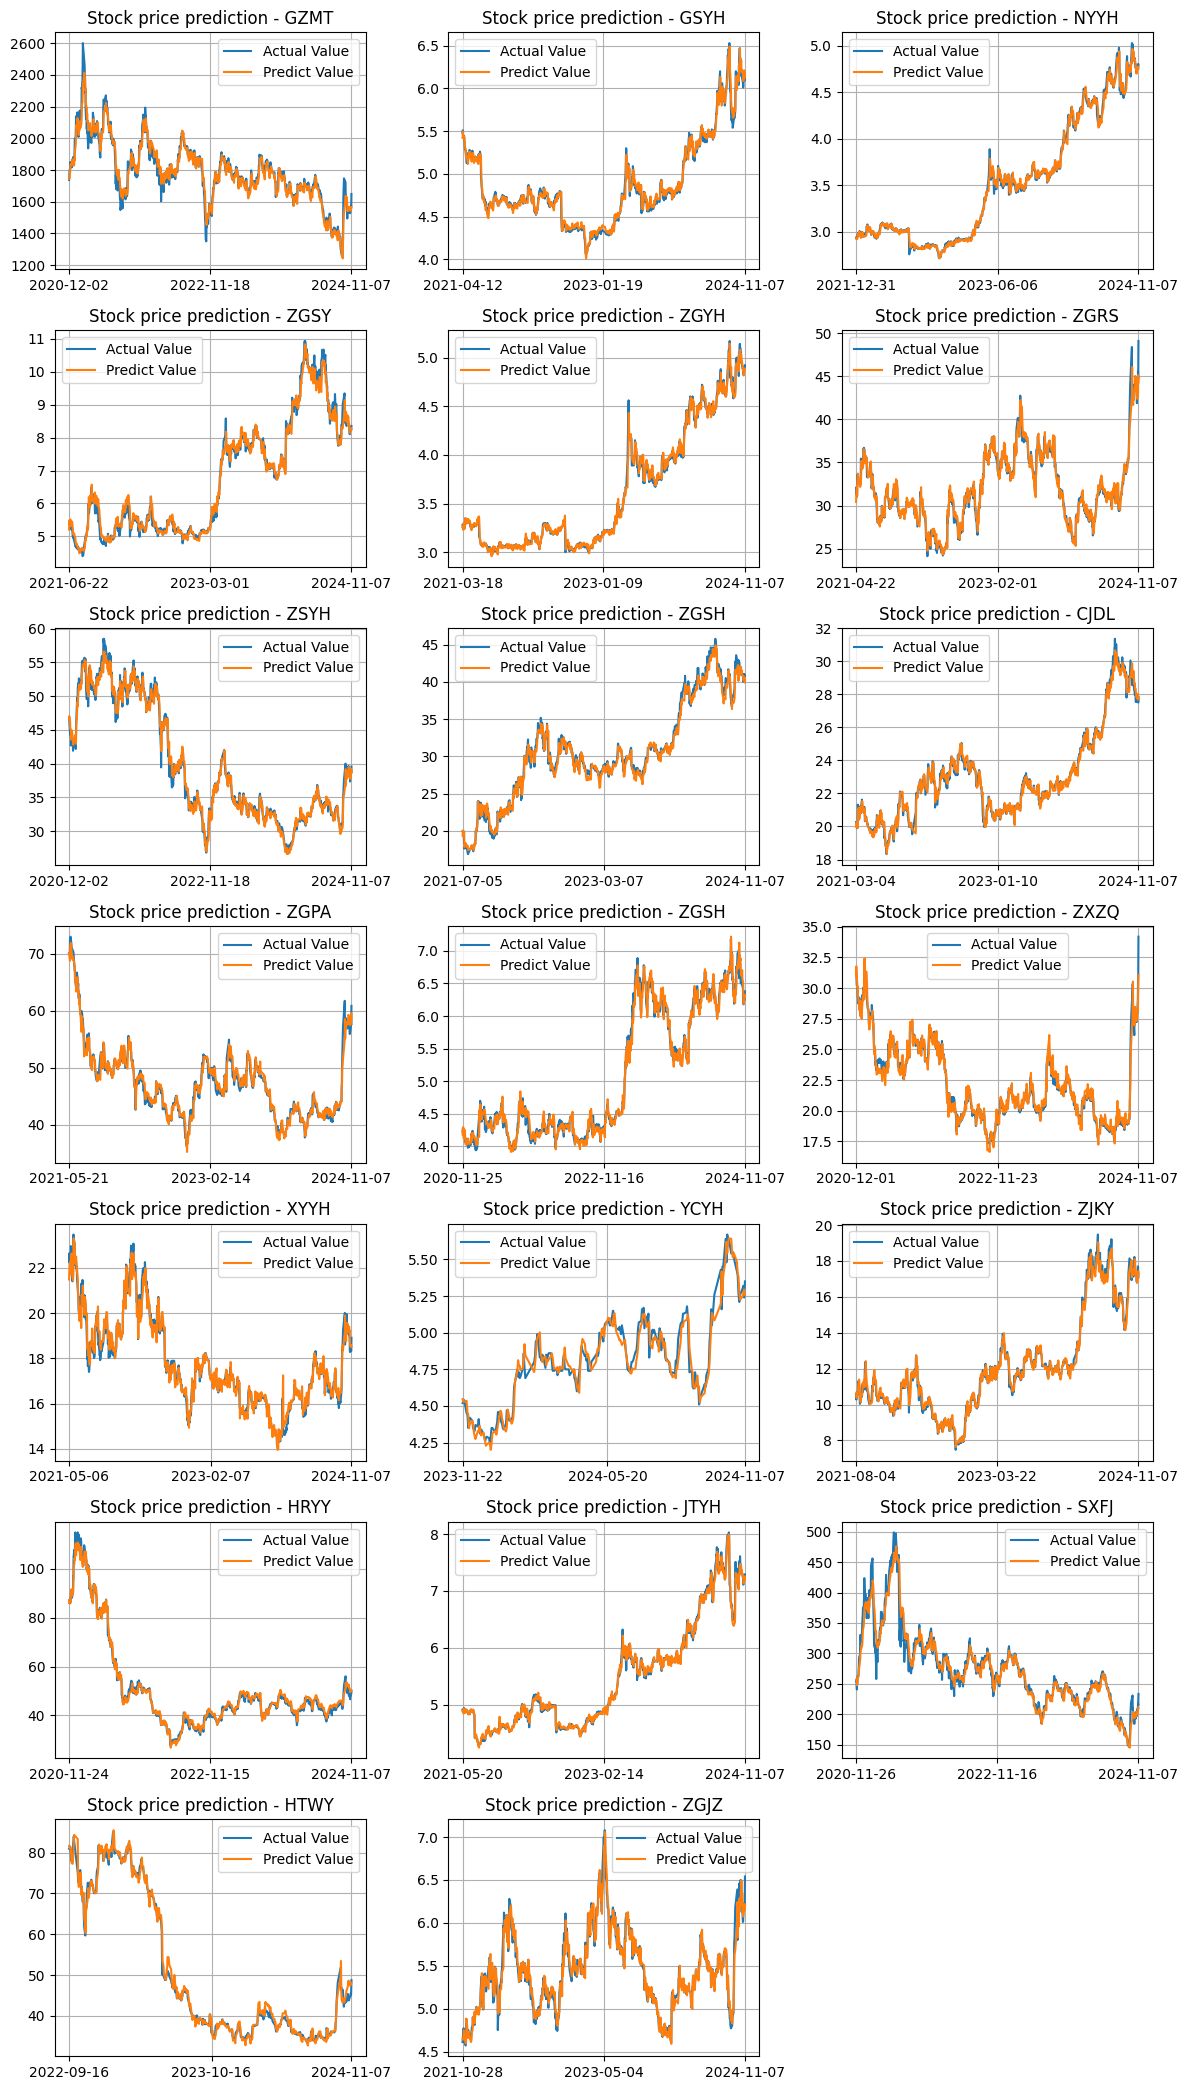

In [119]:
import matplotlib.pyplot as plt

stock_name=list(A_50['股票简称']) #股票代码

y_test_list=[] #画图用的测试集列表
y_test_predict_list=[] #画图用的测试集预测值列表


test_trade_date=[]
#交易日期

for i in stock_code:
    x_train, x_test, y_train, y_test=split_train_test_time_series(X_processed_dict[i],y_processed_dict[i])
    
    
    mm_scaler=y_mm_scaler[i]   #每个股票的标准化器
    y_test_unscaled=mm_scaler.inverse_transform(y_test)  #每个股票反标准化
    
    y_test_list.append(y_test_unscaled.flatten().tolist())
    y_test_predict_list.append(Y_pred[i].flatten().tolist())
    
    trade_date=list(Stock_Y[i].index)
    test_trade_date.append(trade_date[-len(y_test_unscaled):]) #测试集的交易日期

plot_predictions(stock_name,y_test_list,y_test_predict_list,test_trade_date)

## 最终选取“CNN-GRU，RNN，LSTM，GRU，”进行对比实验

In [129]:
def Calculate_Avg_Metrics(model_names):
    results = []
    for model_name in model_names:
        file_name = f'Predict_res/{model_name}_predict_res.csv'
        df = pd.read_csv(file_name)
        avg_mae = df['MAE'].mean()
        avg_mse = df['MSE'].mean()
        avg_mape = df['MAPE'].mean()
        results.append({"模型名称": model_name, "Avg_mae": avg_mae, "Avg_mse": avg_mse, "Avg_mape": avg_mape})
    # 拼接成一个 DataFrame
    avg_results_df = pd.DataFrame(results)
    return avg_results_df

# 使用示例
model_names = ["CNN_GRU", "RNN", "LSTM", "GRU"]
avg_metrics_df = Calculate_Avg_Metrics(model_names)

In [130]:
avg_metrics_df

,模型名称,Avg_mae,Avg_mse,Avg_mape
0,CNN_GRU,0.008541,0.000187,3.130299
1,RNN,0.011663,0.000348,4.789241
2,LSTM,0.008659,0.000192,3.322713
3,GRU,0.008978,0.000212,3.301520
